In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import  Dense, Conv2D, MaxPool2D,Flatten

c:\Users\Sachin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:


train_ds = keras.utils.image_dataset_from_directory(
    directory='C:\\Users\\Sachin\\OneDrive\\Desktop\\python projects\\train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='C:\\Users\\Sachin\\OneDrive\\Desktop\\python projects\\test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [4]:
def process(image,label):
    image=tf.cast(image/255. , tf.float32)
    return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [5]:

model = keras.Sequential()

model.add(keras.layers.Conv2D(
    32,
    kernel_size=(3,3),
    padding='valid',
    activation='relu',
    input_shape=(256,256,3)
))

model.add(keras.layers.BatchNormalization())

model.add(keras.layers.MaxPooling2D(
    pool_size=(2,2),
    strides=2,
    padding='valid'
))


model.add(keras.layers.Conv2D(
    64,
    kernel_size=(3,3),
    padding='valid',
    activation='relu',
    input_shape=(256,256,3)
))

model.add(keras.layers.BatchNormalization())

model.add(keras.layers.MaxPooling2D(
    pool_size=(2,2),
    strides=2,
    padding='valid'
))

model.add(keras.layers.Conv2D(
    128,
    kernel_size=(3,3),
    padding='valid',
    activation='relu',
    input_shape=(256,256,3)
))

model.add(keras.layers.BatchNormalization())

model.add(keras.layers.MaxPooling2D(
    pool_size=(2,2),
    strides=2,
    padding='valid'
))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.1))
model.add(Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

c:\Users\Sachin\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,856,513 (56.67 MB)

 Trainable params: 14,856,065 (56.67 MB)

 Non-trainable params: 448 (1.75 KB)

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1422s 2s/step - accuracy: 0.5550 - loss: 2.3537 - val_accuracy: 0.5674 - val_loss: 0.7243
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1423s 2s/step - accuracy: 0.5929 - loss: 0.6664 - val_accuracy: 0.5652 - val_loss: 0.8103
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1248s 2s/step - accuracy: 0.6023 - loss: 0.6442 - val_accuracy: 0.5914 - val_loss: 0.5985
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1208s 2s/step - accuracy: 0.6498 - loss: 0.5799 - val_accuracy: 0.5408 - val_loss: 0.6314
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1237s 2s/step - accuracy: 0.7084 - loss: 0.5123 - val_accuracy: 0.7564 - val_loss: 0.4971
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10820s 17s/step - accuracy: 0.7628 - loss: 0.4441 - val_accuracy: 0.7208 - val_loss: 0.5377
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2034s 3s/step - accuracy: 0.7897 - loss: 0.4006 - val_accuracy: 0.7704 - val_loss: 0.4832
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12147s 19s/step - accuracy: 0.8176 - loss: 0.349

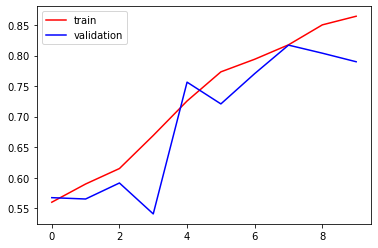

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

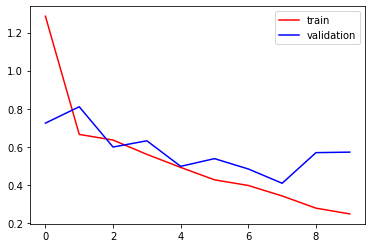

In [10]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [11]:
!pip install opencv-python


In [12]:
import cv2

In [32]:
test_image=cv2.imread('dog.141.jpg')

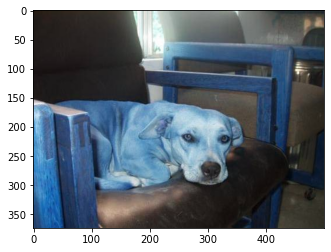

In [33]:
plt.imshow(test_image)

In [34]:
test_image.shape

(374, 500, 3)

In [35]:
test_image=cv2.resize(test_image,(256,256))

In [36]:
test_input=test_image.reshape(1,256,256,3)

In [37]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[1.]], dtype=float32)